In [1]:
from shapely.geometry import Point, Polygon
from shapely import wkt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
# import geoplot

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

# sns.set_palette("coolwarm", 3)
# sns.set_palette(sns.diverging_palette(10, 220, sep=80, n=3, center="dark"))

sns.set_context('talk')

In [2]:
# Show color palette and color codes
# sns.palplot(sns.color_palette(sns.diverging_palette(10, 220, sep=80, n=3)))
# sns.color_palette()

In [3]:
# import data
puds = pd.read_csv('../data/final_datasets/master_puds_blocks.csv')

In [4]:
puds = puds[['OBJECTID_PUD', 'PUD_NAME', 'PUD_WEB_URL',
       'PUD_CHANGE_NARRATIVE', 'PUD_ZONING', 'PUD_STATUS', 'PUD_CASE_NUMBER',
       'SHAPEAREA', 'SHAPELEN', 'GLOBALID', 'WARD', 'Name', 'Description',
       'geometry_ft', 'Zone_Cat', 'CASE_ID_orig', 'ADDRESS', 'PROJECT_NAME',
       'STATUS_PUBLIC', 'AGENCY_CALCULATED', 'AFFORDABLE_UNITS_AT_0_30_AMI',
       'AFFORDABLE_UNITS_AT_31_50_AMI', 'AFFORDABLE_UNITS_AT_51_60_AMI',
       'AFFORDABLE_UNITS_AT_61_80_AMI', 'AFFORDABLE_UNITS_AT_81_AMI',
       'TOTAL_AFFORDABLE_UNITS', 'MAR_WARD', 'Type', 'ANC',
       'Total # Residential Units', '% Affordable Units',
       'Total # of 3 bedroom+ units (Fam sized units)',
       'Ownership (rental vs. condo or mix)',
       'Affordability notes (What levels of AMI% are avail)', 'FULLADDRESS', 'GIS_LAST_MOD_DTTM', 'CASE_ID_update', 'GEOID','geometry_Tract', 'ward', ]]

In [5]:
puds = puds.loc[~puds['OBJECTID_PUD'].isna()]

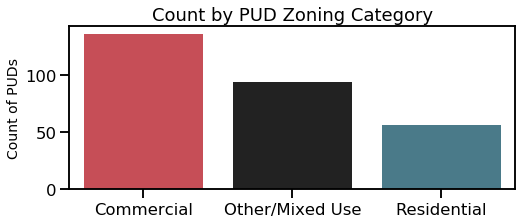

In [6]:
plt.figure(figsize=(8,3))
ax = sns.countplot(x=puds.Zone_Cat,palette=sns.diverging_palette(10, 220, sep=80, n=3, center="dark"));
ax.set_title('Count by PUD Zoning Category');
ax.set_xlabel("");
ax.set_ylabel('Count of PUDs', size=14);

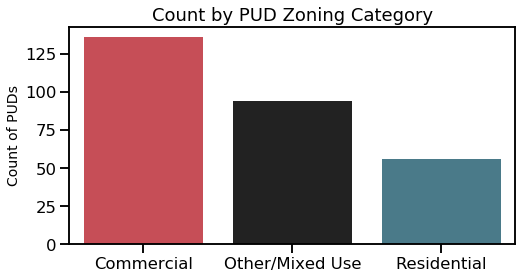

In [7]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x=puds.Zone_Cat,palette=sns.diverging_palette(10, 220, sep=80, n=3, center="dark"));
ax.set_title('Count by PUD Zoning Category');
ax.set_xlabel("");
ax.set_ylabel('Count of PUDs', size=14);

In [8]:
puds.Zone_Cat.count()

286

In [9]:
puds['% Affordable Units'] = np.where(puds['% Affordable Units'].isnull(), 0, puds['% Affordable Units'])

In [10]:
puds_g = puds.loc[~puds['Total # Residential Units'].isnull()][['OBJECTID_PUD', 'PUD_NAME', 'PUD_WEB_URL', 'PUD_CHANGE_NARRATIVE',
       'PUD_ZONING', 'PUD_STATUS', 'PUD_CASE_NUMBER', 'SHAPEAREA', 'SHAPELEN',
       'GLOBALID', 'WARD', 'Name', 'Description', 'Zone_Cat',
       'CASE_ID_orig', 'ADDRESS', 'PROJECT_NAME', 'STATUS_PUBLIC',
       'AGENCY_CALCULATED', 'AFFORDABLE_UNITS_AT_0_30_AMI',
       'AFFORDABLE_UNITS_AT_31_50_AMI', 'AFFORDABLE_UNITS_AT_51_60_AMI',
       'AFFORDABLE_UNITS_AT_61_80_AMI', 'AFFORDABLE_UNITS_AT_81_AMI',
       'TOTAL_AFFORDABLE_UNITS', 'MAR_WARD', 'Type', 'ANC',
       'Total # Residential Units', '% Affordable Units',
       'Total # of 3 bedroom+ units (Fam sized units)',
       'Ownership (rental vs. condo or mix)',
       'Affordability notes (What levels of AMI% are avail)', 'FULLADDRESS',
       'GIS_LAST_MOD_DTTM', 'CASE_ID_update', 'GEOID', 'ward']]

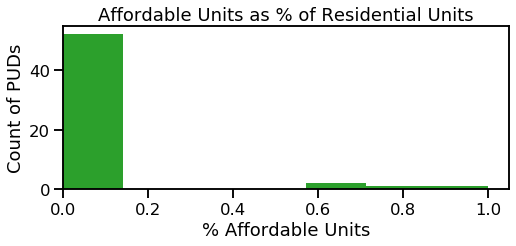

In [11]:
plt.figure(figsize=(8,3))
ax = sns.distplot(puds['% Affordable Units'].loc[(puds['Zone_Cat'] == 'Residential')], hist=True, kde=False, color=sns.color_palette()[2], hist_kws={'alpha':1});
ax.set_xlim(0,None);
ax.set_title('Affordable Units as % of Residential Units');
ax.set_ylabel('Count of PUDs');

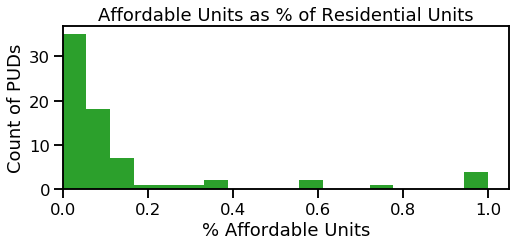

In [12]:
plt.figure(figsize=(8,3))
ax = sns.distplot(puds_g['% Affordable Units'], hist=True, kde=False, color=sns.color_palette()[2], hist_kws={'alpha':1});
ax.set_xlim(0,None);
ax.set_title('Affordable Units as % of Residential Units');
ax.set_ylabel('Count of PUDs');

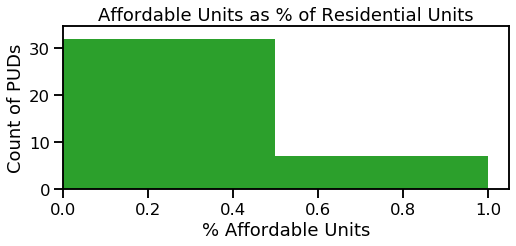

In [13]:
plt.figure(figsize=(8,3))
ax = sns.distplot(puds_g['% Affordable Units'], hist=True, kde=False, bins=[0, .000001, .5, 1], color=sns.color_palette()[2], hist_kws={'alpha':1});
ax.set_xlim(0,None);
ax.set_title('Affordable Units as % of Residential Units');
ax.set_ylabel('Count of PUDs');

In [14]:
viz0 = pd.DataFrame(pd.concat([puds_g['% Affordable Units'], pd.cut(puds_g['% Affordable Units'], bins=[-.01,0, 0.25, .5, .75, 1])], axis=1))
viz0.columns = ['% Affordable Units', 'bin0']
viz0.head(1)

,% Affordable Units,bin0
12,0.127273,"(0.0, 0.25]"


In [15]:
viz0.bin0.value_counts()

(-0.01, 0.0]    33
(0.0, 0.25]     28
(0.75, 1.0]     5 
(0.25, 0.5]     4 
(0.5, 0.75]     2 
Name: bin0, dtype: int64

In [16]:
renaming1 = {'(-0.01, 0.0]': '0%',
'(0.0, 0.25]': '0-25%',
 '(0.25, 0.5]':'25-50%',
 '(0.5, 0.75]':'50-75%',
 '(0.75, 1.0]':'75-100%'}

In [17]:
viz0['bin1'] = viz0.bin0.astype(str).map(renaming1)
viz0.head(1)

,% Affordable Units,bin0,bin1
12,0.127273,"(0.0, 0.25]",0-25%


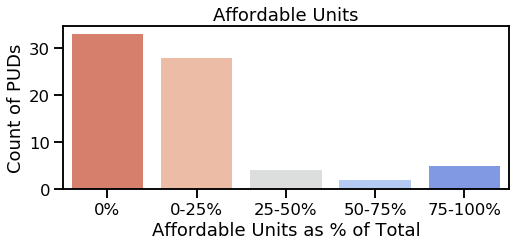

In [19]:
plt.figure(figsize=(8,3))
ax = sns.countplot(viz0['bin1'], order=renaming1.values(), palette="coolwarm_r")
ax.set_ylabel('Count of PUDs');
ax.set_xlabel('Affordable Units as % of Total');
ax.set_title('Affordable Units');
#palette=sns.diverging_palette(10, 220, sep=80, n=5)

In [20]:
renaming2 = {'(-0.01, 0.0]': '0%',
'(0.0, 0.25]': '0-25%',
 '(0.25, 0.5]':'25-100%',
 '(0.5, 0.75]':'25-100%',
 '(0.75, 1.0]':'25-100%'}

In [21]:
viz0['bin2'] = viz0.bin0.astype(str).map(renaming2)
viz0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 12 to 598
Data columns (total 4 columns):
% Affordable Units    72 non-null float64
bin0                  72 non-null category
bin1                  72 non-null object
bin2                  72 non-null object
dtypes: category(1), float64(1), object(2)
memory usage: 4.9+ KB


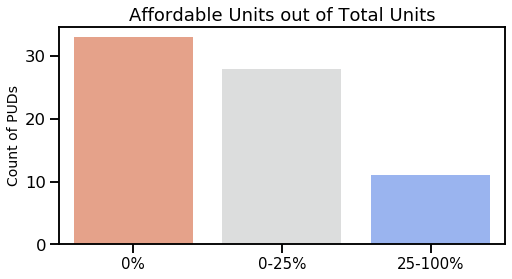

In [27]:
plt.figure(figsize=(8,4))
ax = sns.countplot(viz0['bin2'], order=['0%','0-25%','25-100%'], palette="coolwarm_r")
ax.set_ylabel('Count of PUDs', size=14);
ax.set_xlabel('');
ax.set_title('Affordable Units out of Total Units');
plt.xticks(size=15);


In [ ]:
plt.figure(figsize=(8,3))
ax = sns.countplot(viz0['bin2'], order=['0%','0-25%','25-100%'], palette=sns.diverging_palette(10, 220, sep=80, n=3, center='dark'))
ax.set_ylabel('Count of PUDs');
ax.set_xlabel('');
ax.set_title('Affordable Units out of Total Units');

In [ ]:
puds['geometry_ft'] = puds['geometry_ft'].apply(wkt.loads)

In [ ]:
puds_gis = gpd.GeoDataFrame(puds, geometry='geometry_ft')

In [ ]:
puds_gis.plot();

In [ ]:
ax = geoplot.choropleth(puds_gis, hue=puds.Zone_Cat, linewidth=0, legend=True, cmap='RdBu')